# Rappel du sujet

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.  

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.  

Votre mission :  

Aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.

Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse.

 

Bonjour, 

Pour des raisons de confidentialité, nous ne pouvons pas vous fournir beaucoup de données à ce stade. Ensuite, en raison de ressources limitées, nous avons dû vous fournir l’ensemble des données, alors que seule une partie va vous intéresser. Nos dashboards internes nous indiquent en effet que seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Bien à vous,

Juan, de l’équipe Marketing

# Importation des packages

In [2]:
# Importation des modules requis
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import json
import plotly.express as px
import folium
import folium.plugins
import matplotlib.image as mpimg
import urllib
import datetime as dt
from datetime import timedelta, datetime
%matplotlib inline
from pandas.plotting import scatter_matrix

warnings.filterwarnings('ignore')

# Fonctions

In [3]:
# Fonction d'ouverture et d'affichage d'un dataset
def dataset_overview(data):
    # data : dataframe à utiliser
    
    lines = len(data)
    cols = len(data.columns)
    null_nb = data.isna().sum().sum()
    null_percent = round(data.isna().sum().sum()/(data.size),2)

    display(data.name)
    display(data.shape)
    display(data.head())
    print('\n')

In [4]:
# Fonction graphique : histogramme valeurs nulles (colonnes)
def null_col_graph(data):  
    # data = dataframe à utiliser
    
    fill_rate = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending = False)
    sns.set(style = "darkgrid")
    plt.figure(figsize = (16, 30))
    ax = sns.barplot(y = fill_rate.index, x = fill_rate.values)
    ax.xaxis.set_ticks_position('top')
    plt.title('% de valeurs manquantes par colonne', size = 15)
    plt.ylabel('Colonnes')
    plt.xlabel('%')
    plt.show()

In [5]:
# Fonction graphique : diagramme circulaire
def pie(df, var):
    # df : dataframe à utiliser 
    # var : variable à analyser
    
    plt.figure(figsize = (8,8))
    plt.title("Répartition de :\n {}".format(var) , size = 20)
    wedges, texts, autotexts = plt.pie(df[var].value_counts().values, 
                                       labels = df[var].value_counts().index.str.upper(),
                                       autopct = "%1.1f%%", textprops = {"fontsize": 12})
    plt.show()
    return None

# Ouverture et analyse du Dataset

In [6]:
# Nommage des différents datasets

customers = pd.read_csv('olist_customers_dataset.csv')
customers.name = 'customers'

geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation.name = 'geolocation'

order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.name = 'order items'

order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.name = 'order payments'

order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.name = 'order reviews'

orders = pd.read_csv('olist_orders_dataset.csv')
orders.name = 'orders'

products = pd.read_csv('olist_products_dataset.csv')
products.name = 'products'

sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.name = 'sellers'

categories = pd.read_csv('product_category_name_translation.csv')
categories.name = 'categories'


Dataset = [customers,
          geolocation,
          order_items,
          order_payments,
          order_reviews,
          orders,
          products,
          sellers,
          categories]

In [7]:
# Ouverture des différents datasets, avec formats

for data in Dataset:
    dataset_overview(data)

'customers'

(99441, 5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'geolocation'

(1000163, 5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'order items'

(112650, 7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'order payments'

(103886, 5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'order reviews'

(99224, 7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'orders'

(99441, 8)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'products'

(32951, 9)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'sellers'

(3095, 4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'categories'

(71, 2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# Tableau de synthèse des datasets : colonnes, formats, doublons, valeurs nulles

titles = ["customers", 
          "geolocation", 
          "order_items", 
          "order_payments", 
          "order_reviews", 
          "orders", 
          "products", 
          "sellers", 
          "categories"
         ]

data_summary = pd.DataFrame({},)
data_summary['Dataset'] = titles
data_summary['Colonnes'] = [', '.join([col for col in data.columns ]) for data in Dataset]
data_summary['Total_lignes'] = [data.shape[0] for data in Dataset]
data_summary['Total_colonnes'] = [data.shape[1] for data in Dataset]
data_summary['Total_doublons'] = [data.duplicated().sum() for data in Dataset]
data_summary['Total_valeurs_nulles'] = [data.isnull().sum().sum() for data in Dataset]
data_summary['Colonnes_avec_nulles'] = [', '.join([col for col, null in data.isnull().sum().items()\
                                                   if null > 0]) for data in Dataset]
data_summary.style.background_gradient(cmap = 'YlGnBu')

,Dataset,Colonnes,Total_lignes,Total_colonnes,Total_doublons,Total_valeurs_nulles,Colonnes_avec_nulles
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,order_reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,categories,"product_category_name, product_category_name_english",71,2,0,0,


# Analyse des différents Datasets

## Geolocation

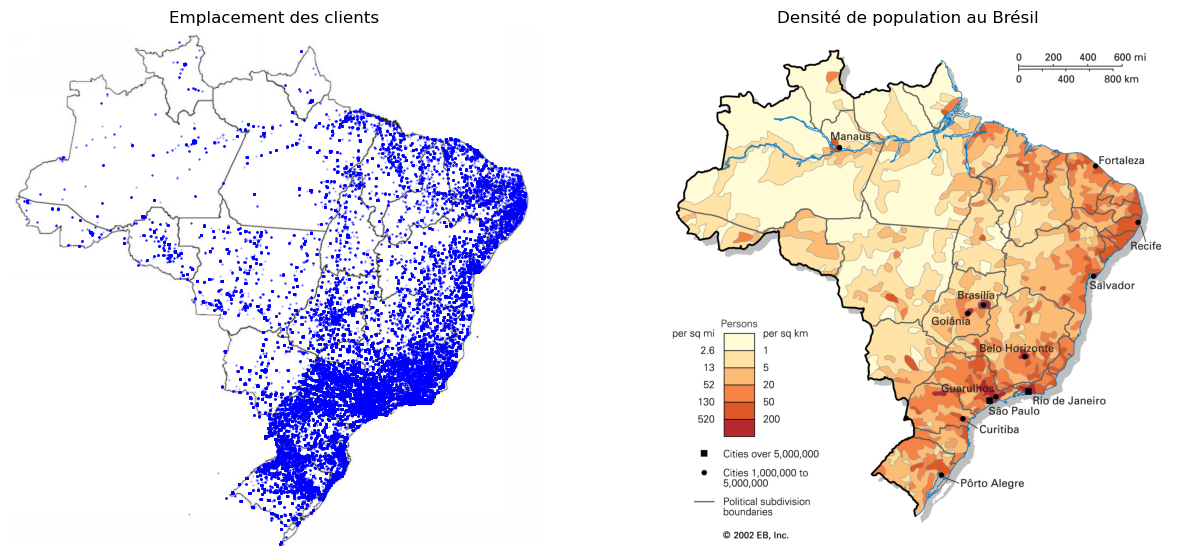

In [9]:
# Répartition géographique des commandes, et densité de population au Brésil

brazil = mpimg.imread(urllib.request.urlopen\
                      ('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
brazil_pop = mpimg.imread(urllib.request.urlopen\
                          ('https://i.pinimg.com/originals/49/6a/9e/496a9eb46b42ea18ec4cc9922ba1cec7.gif'),'gif')
fig, (ax1, ax2) = plt.subplots(1,2)
geolocation.plot(
    kind = "scatter",
    x = "geolocation_lng",
    y = "geolocation_lat",
    ax = ax1,
    figsize = (15,15),
    alpha = 0.3,
    s = 0.3,
    c = 'blue'
)
ax1.imshow(brazil, extent = [-73.98283055, -33.8,-33.75116944,5.4])
ax1.axis('off')
ax1.set_title('Emplacement des clients')
ax2.imshow(brazil_pop)
ax2.axis('off')
ax2.set_title('Densité de population au Brésil')
plt.show()

Ce fichier est intéressant afin d'observer la répartition géographique des clients. Nous remarquons ici qu'elle correspond à la densité de population du pays.  
Dans le cadre de la modélisation, nous n'utiliserons pas ces données.

## Products

In [10]:
# Remplacement de la catégorie par category_name_english, puis renommée

products = pd.merge(products, categories, on = 'product_category_name', how = 'left')
products.drop('product_category_name', axis = 1, inplace = True)
products = products.rename(columns = {'product_category_name_english':'product_category_name'})

# Suppression des colonnes inutiles relatives auxa caractéristiques produits

cols_to_delete = ['product_name_lenght',
                  'product_description_lenght',
                  'product_photos_qty',
                  'product_weight_g',
                  'product_length_cm',
                  'product_height_cm',
                  'product_width_cm'
                 ]
products.drop(cols_to_delete, axis = 1, inplace = True)
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


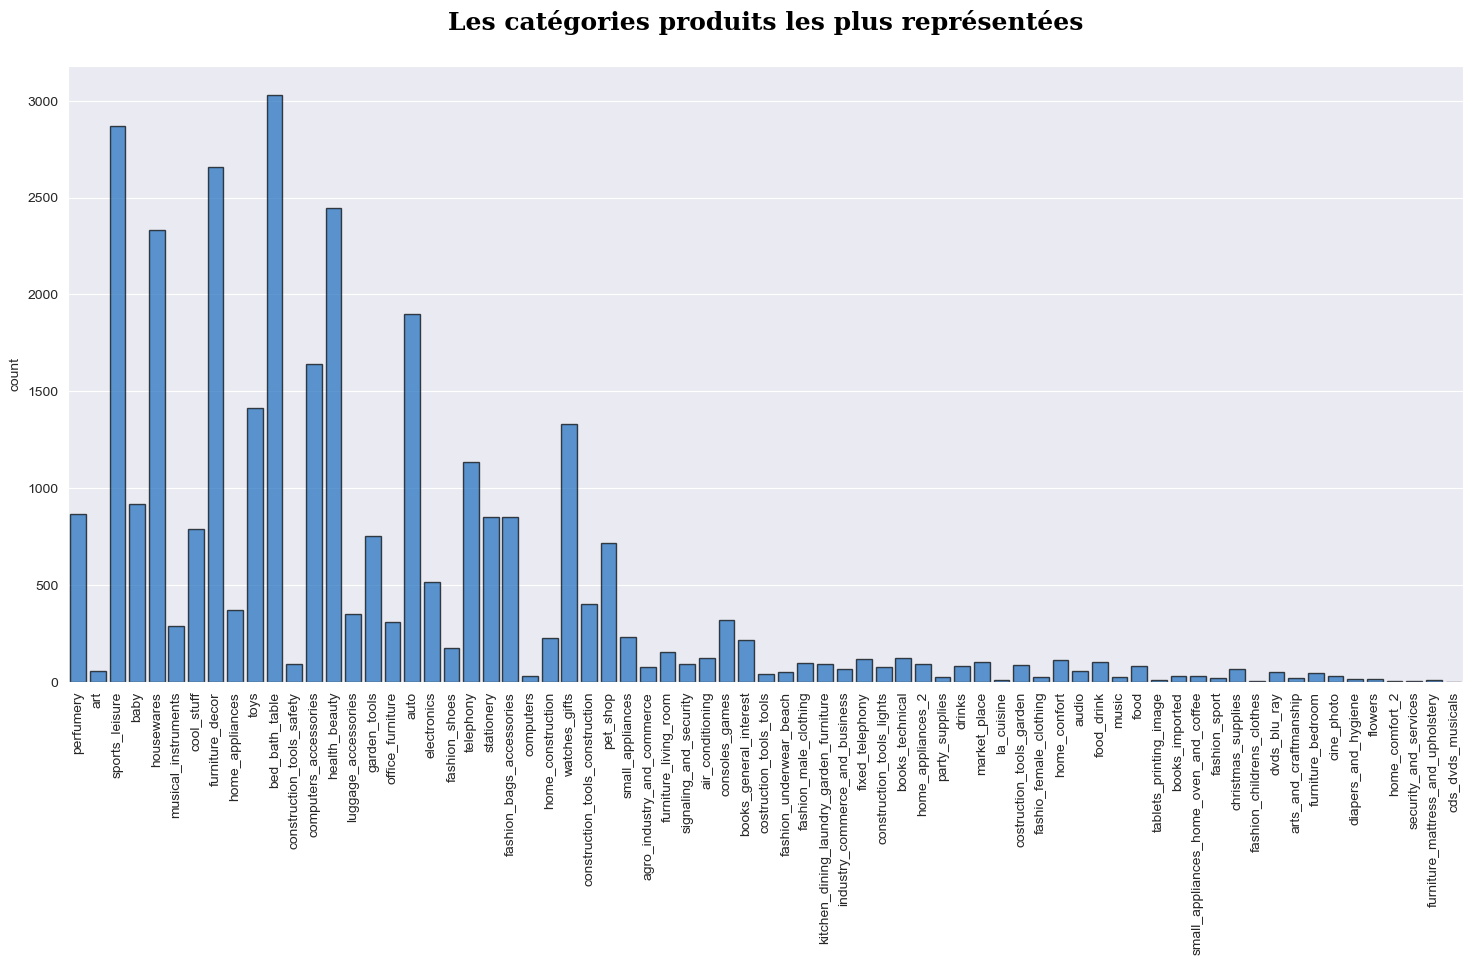

In [11]:
# Représentation graphique : nombre de commandes par catégories produits

sns.set_style("darkgrid")
font_title = {"family": "serif",
              "color":  "black",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize = (18, 8))
sns.countplot(data = products, x = products['product_category_name'],
              edgecolor = "black",
              color = "#006dd9", alpha = 0.7)
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict = font_title)
plt.show()

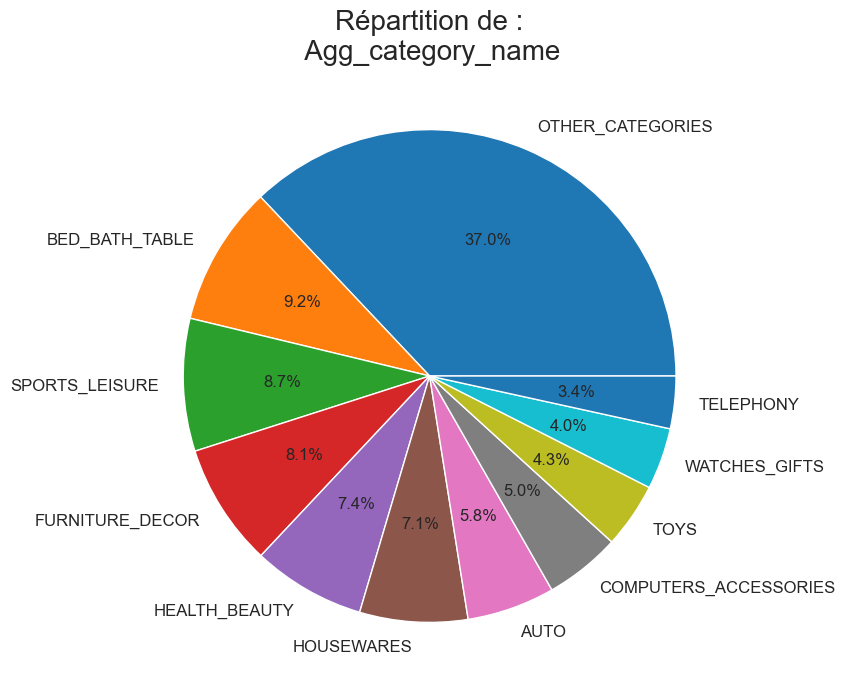

In [12]:
# Regroupement de catégories et représentation graphique de leur répartition

condition = products['product_category_name'].value_counts().cumsum() / products['product_category_name'].value_counts().sum() * 100
List = condition.index[condition <= 65]

# Regrouper les modalités les moins présentes dans "other categories"

products.loc[:, 'Agg_category_name'] = products['product_category_name'].map(lambda x : x if x in List else "other_categories")
pie(products, 'Agg_category_name')

## Customers

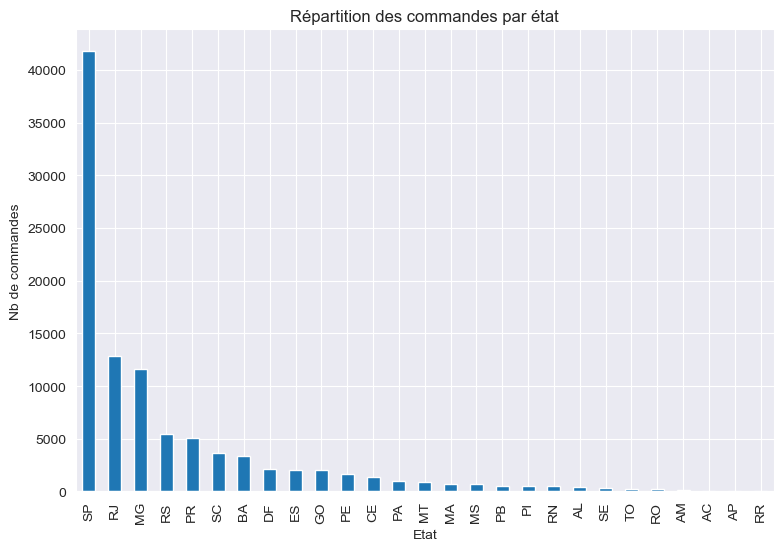

In [13]:
# Etats du Brésil les plus représentés dans les commandes

customers.customer_state.value_counts().plot(kind = "bar", figsize = (9, 6))
plt.title("Répartition des commandes par état")
plt.ylabel('Nb de commandes')
plt.xlabel('Etat')
plt.show()

Text(0.5, 1.0, "Proportion de clients ayant passé plus d'une commande")

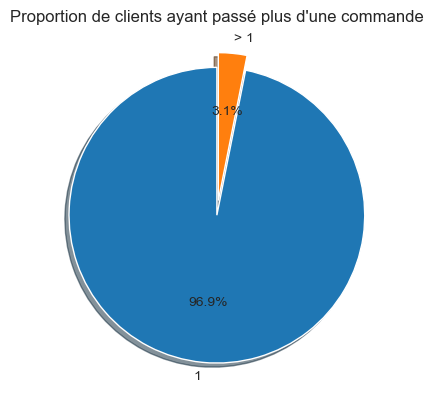

In [14]:
# Récurence de commande par client

customer_unique_ids = customers[['customer_unique_id']].to_numpy().flatten()
unique, counts = np.unique(customer_unique_ids, return_counts = True)
customer_unique_ids_counts = dict(zip(unique, counts))
count, count_of_counts = np.unique(counts, return_counts = True)
multiple_orders = dict(zip(count, count_of_counts))
multiple_orders

labels = '1', '> 1'
sizes = multiple_orders[1], sum(multiple_orders.values()) - multiple_orders[1]
explode = (0,0.1)
plt.pie(
    sizes,
    explode = explode,
    labels = labels,
    autopct = '%1.1f%%',
    shadow = True,
    startangle = 90
)
plt.title("Proportion de clients ayant passé plus d'une commande")

3.1% des clients ont passé plusieurs commandes sur le site.

## Order_items

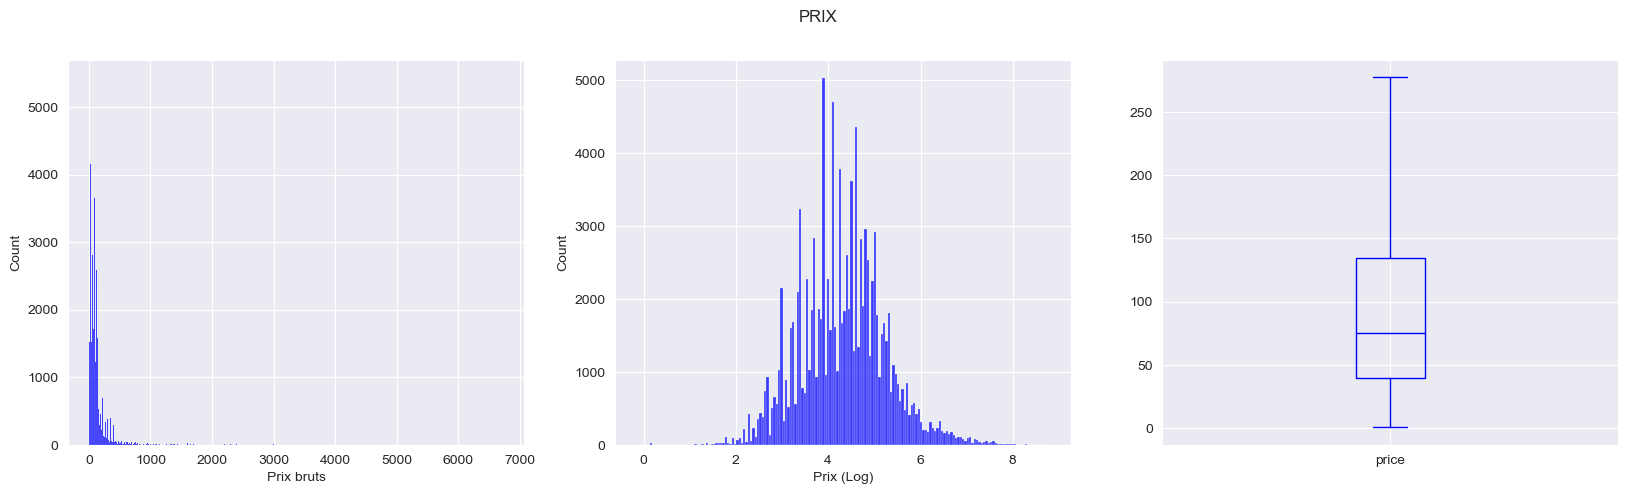

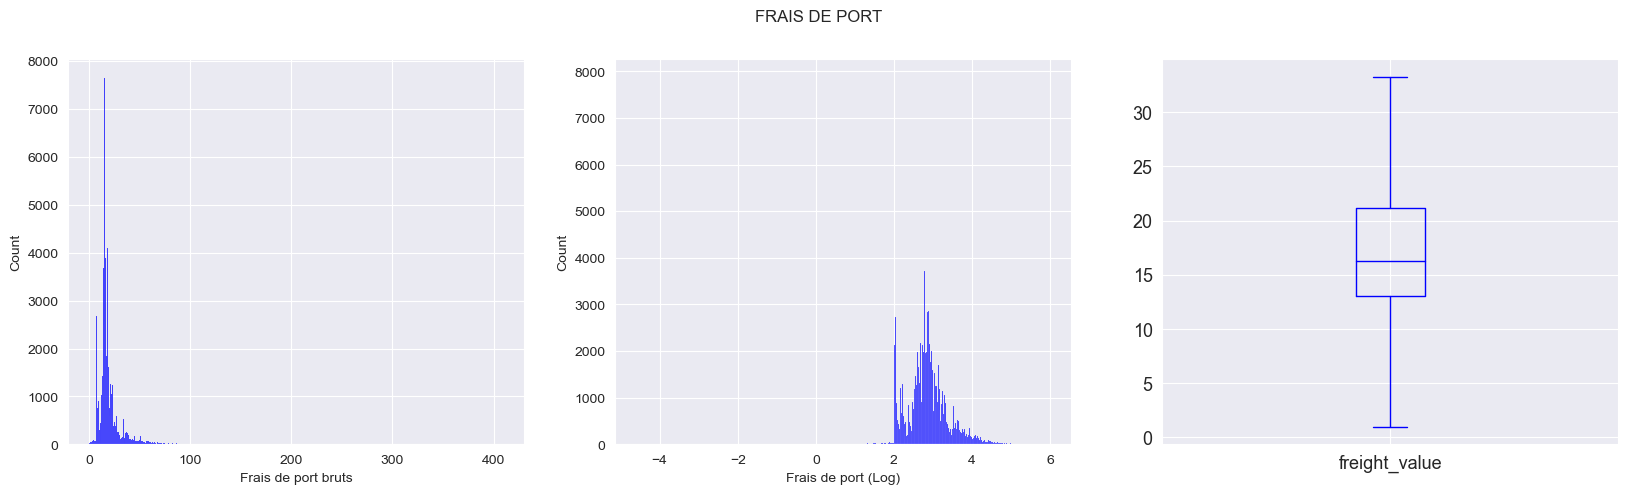

In [15]:
# Analyse graphique des prix et frais de port, avec passage au Log

sns.set_style("darkgrid")

# Prix

plt.figure(figsize = (20,5))
plt.subplot(131)
fig = sns.histplot(data = order_items, x = order_items['price'], color = 'blue')
fig.set_xlabel("Prix bruts")
plt.subplot(132)
ax = sns.histplot(data = order_items, x = np.log(order_items['price']), color = 'blue')
ax.set_xlabel("Prix (Log)")
plt.subplot(133)
ax = order_items['price'].plot.box(color = 'b',showfliers = False)
plt.suptitle("PRIX")
plt.show()

# Frais de port

plt.figure(figsize = (20,5))
plt.subplot(131)
fig = sns.histplot(data = order_items, x = order_items['freight_value'], color = 'blue')
fig.set_xlabel("Frais de port bruts")
plt.subplot(132)
ax = sns.histplot(data = order_items, x = np.log(order_items['freight_value']), color = 'blue')
ax.set_xlabel("Frais de port (Log)")
plt.subplot(133)
ax = order_items['freight_value'].plot.box(color = 'b',showfliers = False)
plt.suptitle("FRAIS DE PORT")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

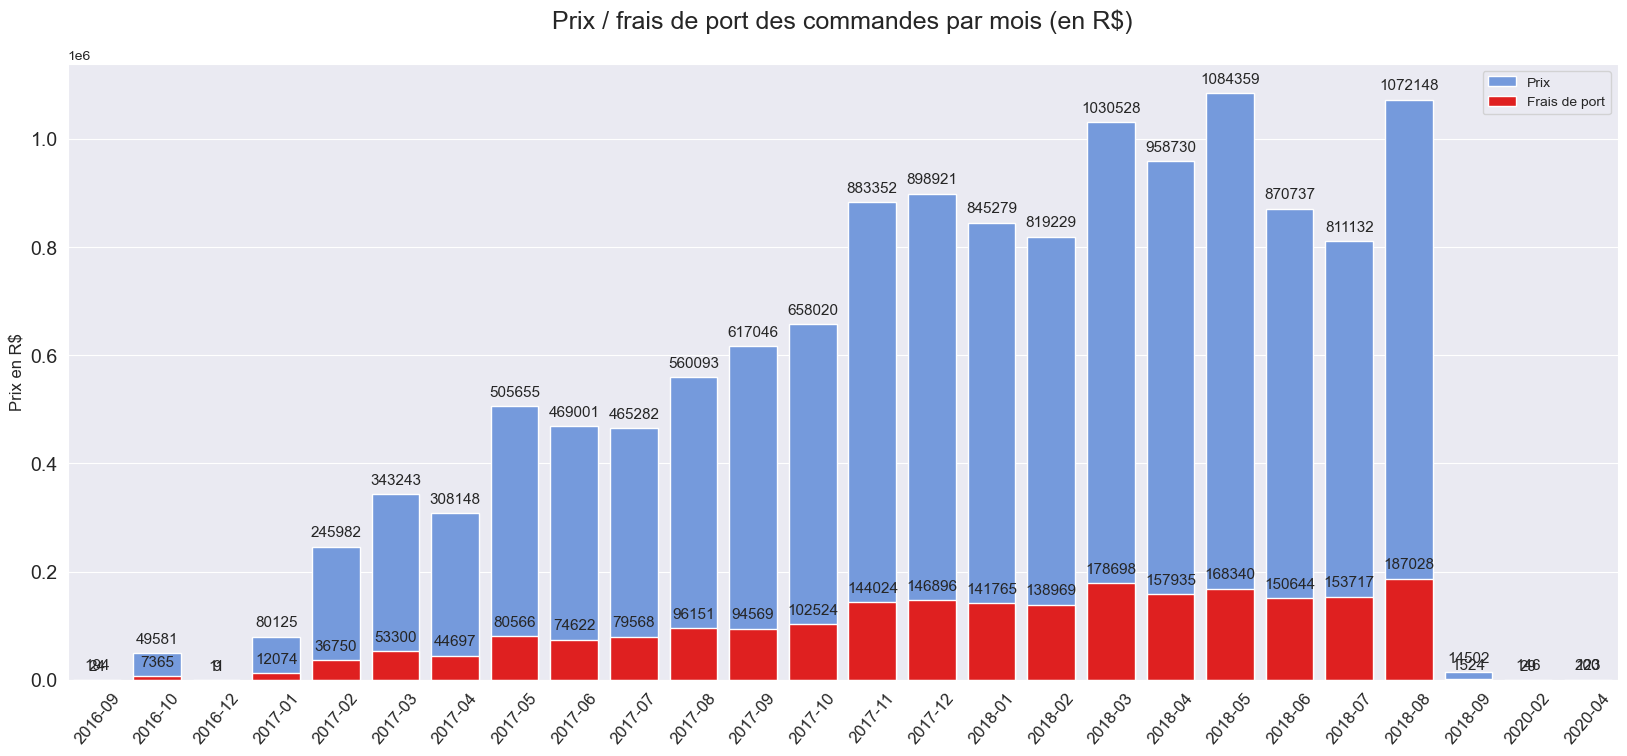

In [23]:
#Représentation graphique : montant total de commandes par mois, et part des frais de port

order_items['total_price'] = order_items['price'] + order_items['freight_value']

sns.set_style("darkgrid")

df_order_items = order_items.copy()
df_order_items['shipping_limit_date'] = df_order_items['shipping_limit_date'].apply\
                                            (pd.to_datetime, format = '%Y-%m-%d %H:%M:%S.%f')
df_order_items['shipping_limit_date'] = df_order_items['shipping_limit_date'].dt.strftime('%Y-%m')

data_price_ship = df_order_items.groupby(['shipping_limit_date']).\
                                            agg({"price" : "sum", "freight_value" : "sum"}).reset_index()
data_price_ship
data_price_ship.rename(columns = {"price":"total_price"}, inplace = True)
data_price_ship.rename(columns = {"freight_value":"total_freight"}, inplace = True)

x = data_price_ship['shipping_limit_date']
y = data_price_ship['total_price']
y_bis = data_price_ship['total_freight']

fig, ax = plt.subplots(figsize = (20,8))

sns.barplot(x = x, y = y, data = data_price_ship, color = 'cornflowerblue',label = 'Prix')
sns.barplot(x = x, y = y_bis, data = data_price_ship, color = 'red', label = 'Frais de port')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 11,
                )

ax.set_ylabel('Prix en R$', fontsize = 12)

plt.xticks(rotation = '50', fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('', fontsize = 16)

plt.title('Prix / frais de port des commandes par mois (en R$)\n', fontsize = 18)
plt.legend()

plt.show()

Nous remarquons ici des montants de commande très faibles avant 2017, et à partir de 2018-09. CEtte information sera importante dans le cadre de la modélisation et de la simulation de maintenance.

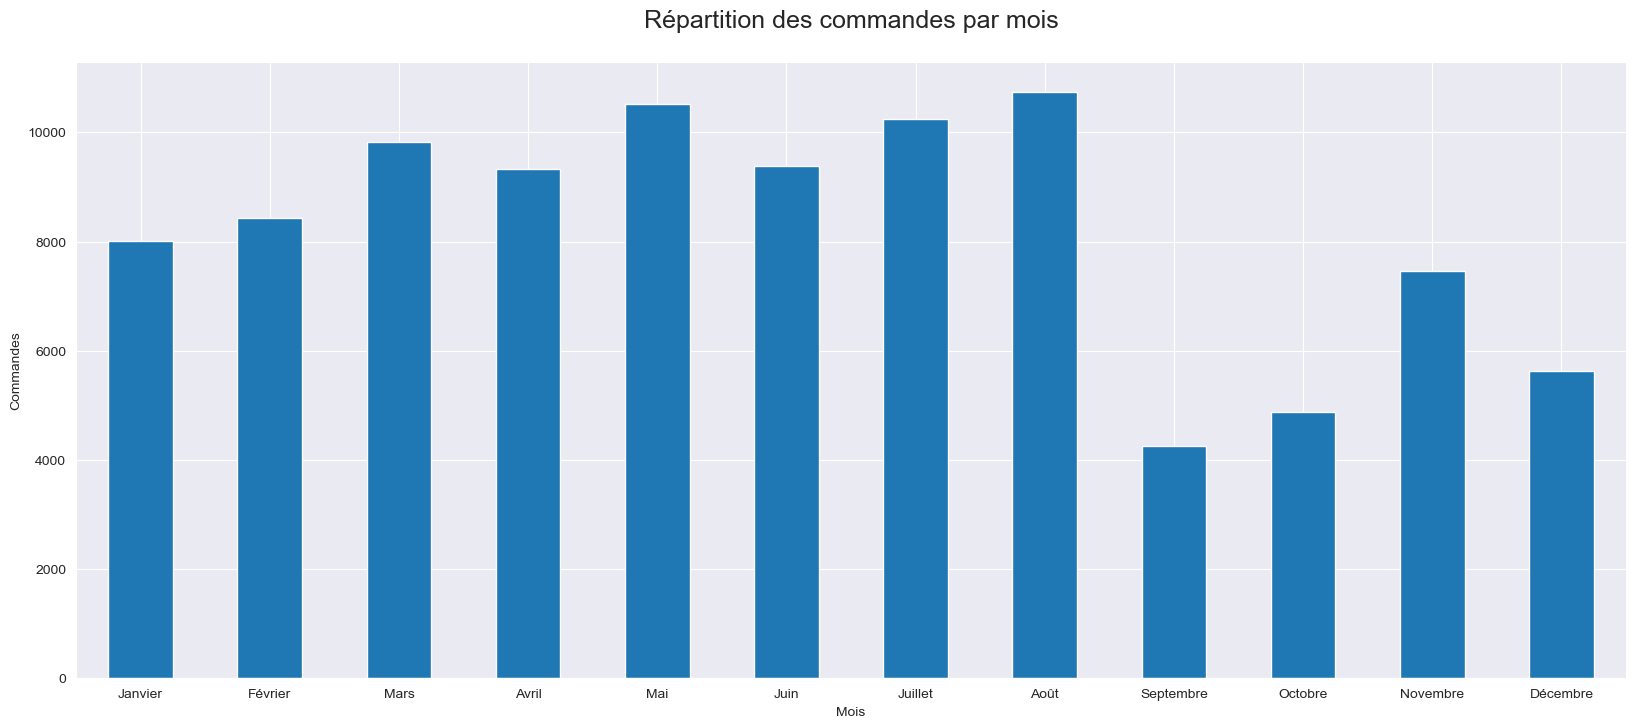

In [16]:
# Représentation graphique : histogramme des volumes de commandes selon le mois de l'année

order_items_new = pd.merge(order_items, orders, how = 'left')
order_items_new['order_purchase_timestamp'] = order_items_new['order_purchase_timestamp'].astype('datetime64[ns]')

order_items_new.groupby(order_items_new['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize = (20,8), kind = "bar",
          ylabel = "Commandes",
          xlabel = "Mois",
          legend = False)
plt.title("Répartition des commandes par mois\n", fontsize = 18)
plt.xticks(np.arange(0,12), ['Janvier','Février','Mars','Avril','Mai','Juin',
                             'Juillet','Août','Septembre','Octobre','Novembre','Décembre'], 
           rotation = 'horizontal')
plt.show()

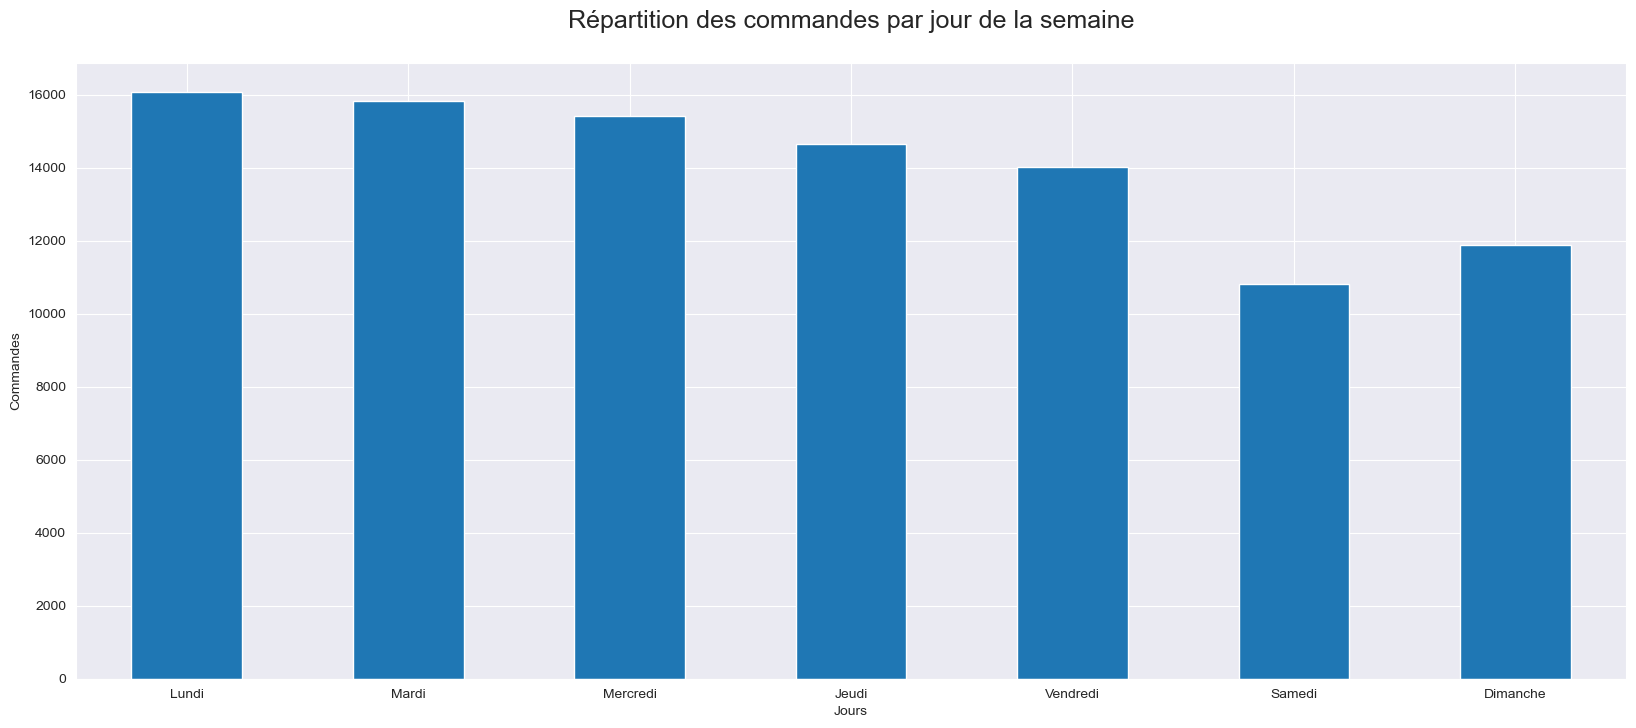

In [17]:
# Représentation graphique : histogramme des volumes de commandes selon le jour de la semaine

order_items_new.groupby(order_items_new['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize = (20,8), kind = "bar",
          ylabel = "Commandes",
          xlabel = "Jours",
          legend = False)
plt.title("Répartition des commandes par jour de la semaine\n", fontsize = 18)
plt.xticks(np.arange(0,7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'], rotation = 'horizontal')
plt.show()

On note des volumes de commande plus importants la semaine que le weekend.

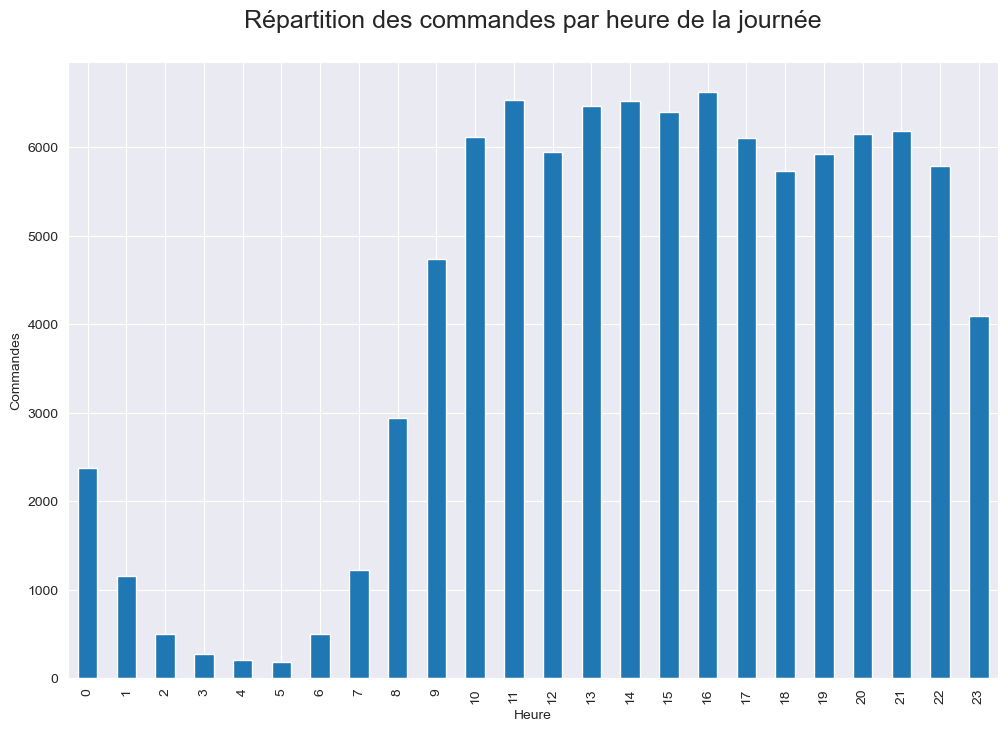

In [18]:
# Représentation graphique : histogramme des volumes de commandes selon l'heure de la journée

order_items_new.groupby(order_items_new['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize = (12,8), kind = "bar",
          ylabel = "Commandes",
          xlabel = "Heure",
          legend = False)
plt.title("Répartition des commandes par heure de la journée\n", fontsize = 18)
plt.show()

On note des volumes de commande significatifs entre 8h et 23h.

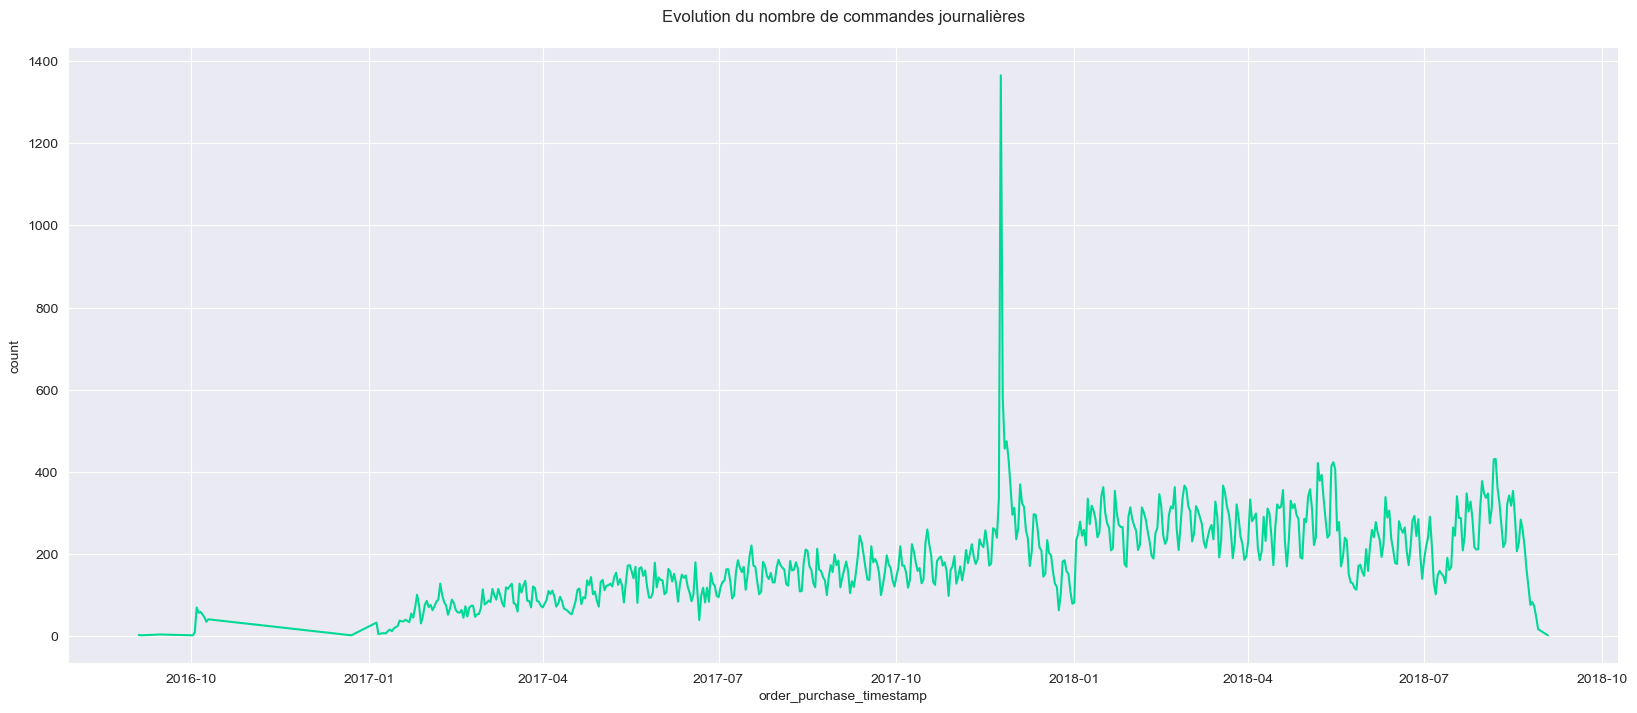

In [19]:
# Représensation graphique : nombre de commandes par jour

order_per_days = order_items.groupby(order_items_new['order_purchase_timestamp']\
                                     .astype('datetime64[ns]').dt.date).count()["order_id"]
fig = plt.figure(figsize = (20, 8))
ax = order_per_days.plot(color = "#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n")
plt.show()

Il y a un gros pic d'activité au moment de Noël.

## Order_payments

Text(0.5, 1.0, 'Le type de paiement des commandes')

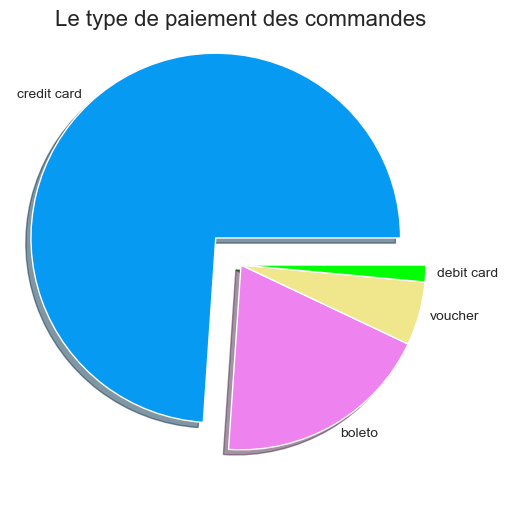

In [20]:
# Représentation graphique : répartition des commandes par moyen de paiement

colors = ['#069AF3', '#EE82EE', '#F0E68C', 'lime']
plt.figure(figsize = (6, 6))

data_type = order_payments.groupby(['payment_type']).agg({"order_id" : "count"}).reset_index()
data_type = data_type[data_type['order_id']>3].sort_values(by = 'order_id', ascending = False)
y = data_type['payment_type'].str.replace('_', ' ')
x = data_type['order_id']
labels = y

# Appel de la fonction Pie

plt.pie(x, labels = y,
           explode = [0.2, 0, 0, 0],
           pctdistance = 0.7, 
           labeldistance = 1.06,
           colors = colors,
           shadow = True)
plt.title('Le type de paiement des commandes', fontsize = 16)

Le principal moyen de paiement est la carte de crédit, viennent ensuite les paiements en espèce (boleto, système spécifique au Brésil), par bons d'achat puis par carte de débit.

## Order_reviews

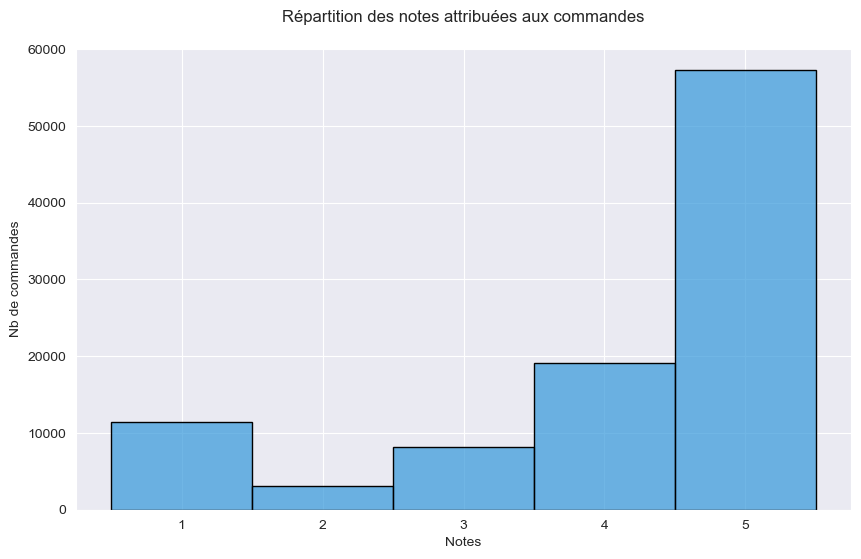

In [21]:
# Représentation graphique : volumes de commande en fonction de la note client attribuée (review_score)

fig = plt.figure(figsize = (10, 6))
sns.histplot(data = order_reviews, x = "review_score", 
             discrete = True,
             edgecolor = "black",
             color = "#3498DB", alpha = 0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n")
plt.xlabel('Notes')
plt.ylabel('Nb de commandes')
plt.show()

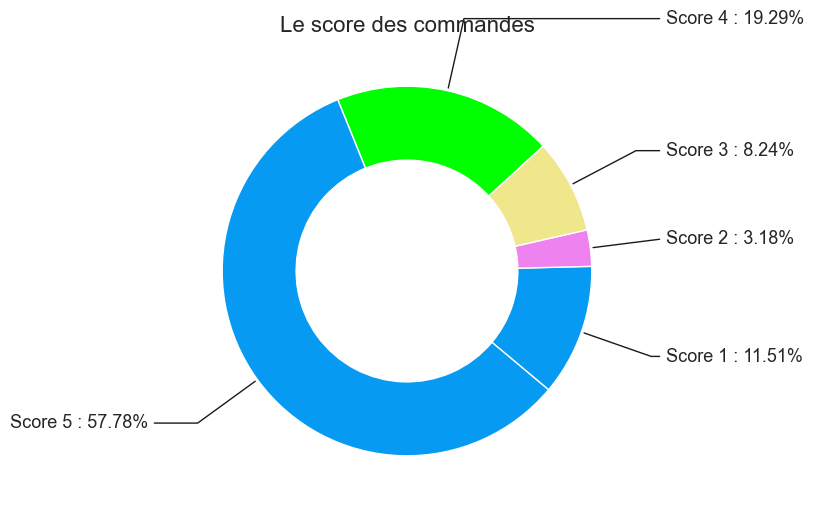

In [23]:
# Représentation graphique : répartion des notes client (review_score)

data_score = order_reviews.groupby(['review_score']).agg({"order_id" : "count"}).reset_index()
data_score.rename(columns = {"order_id":"nb_score"}, inplace = True)
data_score = data_score.sort_values(by='review_score').reset_index()

y_score = data_score['review_score']
x_score = data_score['nb_score']


fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(aspect = "equal"))

colors = ['#069AF3', '#EE82EE', '#F0E68C', 'lime']

kw = dict(arrowprops = dict(arrowstyle = "-"),
          zorder = 0, va = "center",fontsize = 13)

wedges, texts = plt.pie(x_score, wedgeprops = dict(width = 0.4), startangle = -40, colors = colors)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle}, color = "0.1")
    ax.annotate('Score %s'%y_score[i]+' : '+np.round(((x_score[i]/sum(x_score))*100),2).astype(str)+'%',
                xy = (x, y), xytext = (1.4 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)


plt.title('Le score des commandes', fontsize = 16)
plt.show()

## Orders

Text(0.5, 1.0, 'Evolution du nb de commandes')

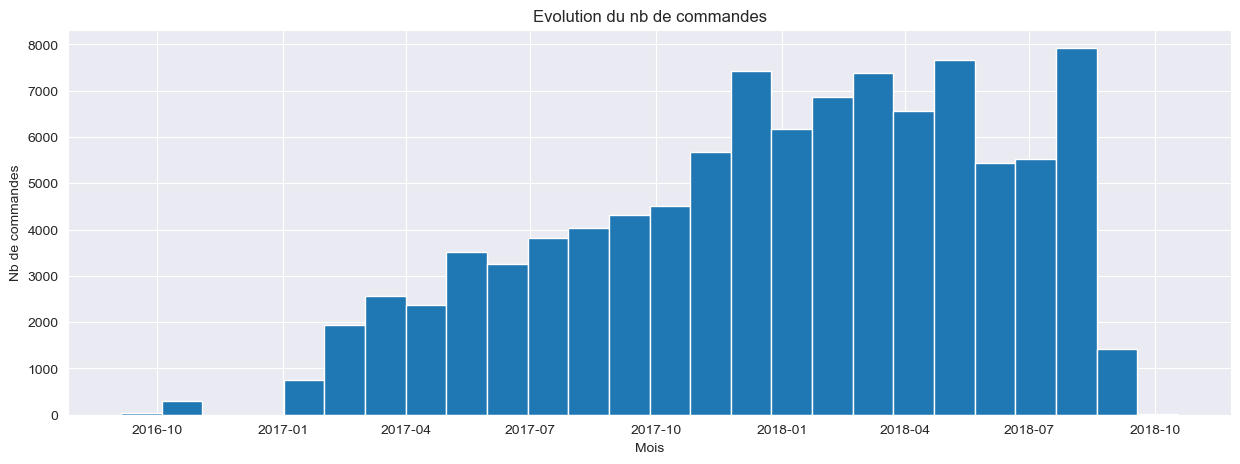

In [24]:
# Représentation graphique : évolution temporelle du nombre de commandes 

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format = '%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format = '%Y-%m-%d %H:%M:%S')

orders['order_purchase_timestamp'].hist(figsize = (15,5), bins = 2*12+10 - 9 + 1)
plt.xlabel('Mois')
plt.ylabel('Nb de commandes')
plt.title('Evolution du nb de commandes')

Comme vu précédemment, on note une quantité très faible de commandes avant 2017 et après 2018-09.

Text(0.5, 1.0, 'Délai de livraison (jours)')

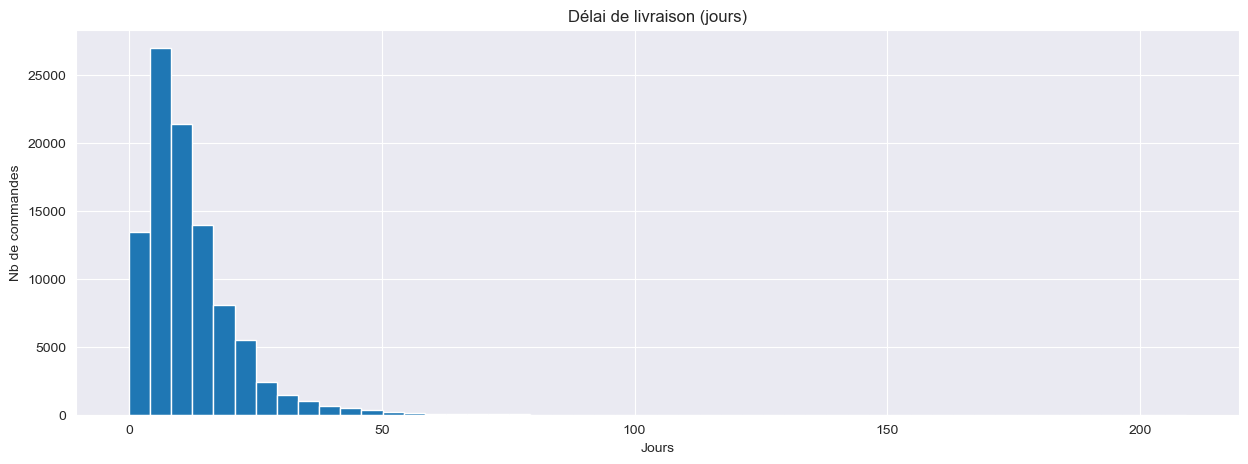

In [25]:
# Représentation graphique : délais de livraison

delivery_time = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
est_delivery_time = orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']
est_real_delivery_time = est_delivery_time - delivery_time

delivery_time.astype('timedelta64[D]').plot.hist(figsize = (15,5), bins = 50)
plt.xlabel('Jours')
plt.ylabel('Nb de commandes')
plt.title('Délai de livraison (jours)')

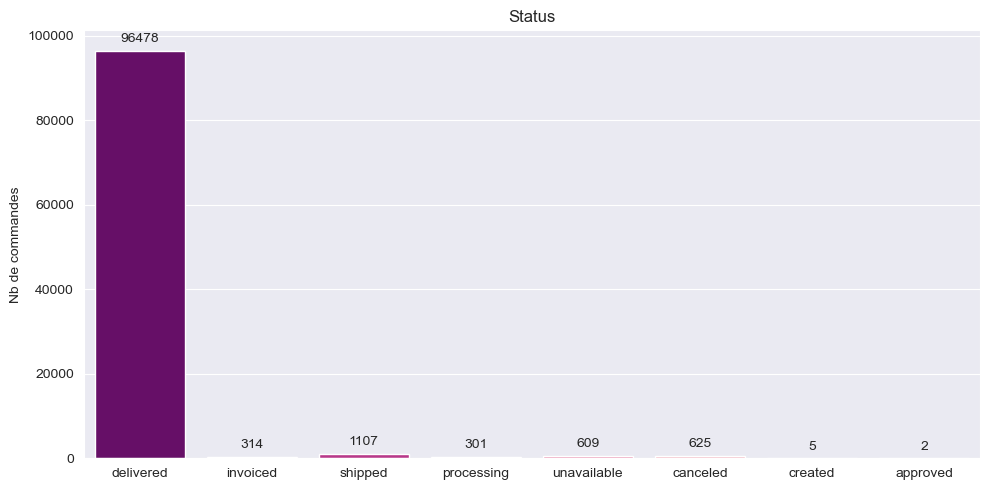

In [26]:
# Représentation graphique : statut des commandes

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, x = 'order_status', data = orders, palette = 'RdPu_r').set(xlabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Status')
plt.ylabel('Nb de commandes')

plt.tight_layout()

Nous ne conserverons que les commandes en statut 'delivered'.

In [27]:
# On ne conserve que les commandes en statut "delivered"
orders = orders[orders['order_status'] == 'delivered']
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


# Fusion des datasets

In [33]:
# Création d'un fichier global par merging successifs des différents fichiers avec leurs variables communes

df_merged = pd.merge(order_items, order_payments, on = 'order_id', how = 'inner')
df_merged2 = pd.merge(df_merged, order_reviews, on='order_id', how = 'inner')
df_merged3 = pd.merge(df_merged2, orders, on = 'order_id', how = 'inner')
df_merged4 = pd.merge(df_merged3, customers, on = 'customer_id', how = 'inner')
df_merged5 = pd.merge(df_merged4, products, on = 'product_id', how = 'inner')

global_data = df_merged5.copy()

In [34]:
# Suppression des colonnes inutiles
cols_to_drop = ['order_id',
                'product_id',
                'seller_id',
                'shipping_limit_date',
                'payment_type',
                'review_id',
                'review_comment_title',
                'review_comment_message',
                'review_creation_date',
                'review_answer_timestamp',
                'customer_id',
                'order_status',
                'order_approved_at',
                'order_delivered_carrier_date',
                'order_delivered_customer_date',
                'order_estimated_delivery_date',
                'customer_zip_code_prefix',
                'customer_city',
                'customer_state',
                'product_category_name'
               ]

global_data.drop(cols_to_drop, axis = 1, inplace = True)
global_data

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,order_purchase_timestamp,customer_unique_id,Agg_category_name
0,1,58.9,13.29,1,2,72.19,5,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,other_categories
1,1,55.9,17.96,1,1,73.86,5,2017-06-28 11:52:20,0fb8e3eab2d3e79d92bb3fffbb97f188,other_categories
2,1,64.9,18.33,1,2,83.23,4,2018-05-18 10:25:53,3419052c8c6b45daf79c1e426f9e9bcb,other_categories
3,1,58.9,16.17,1,3,75.07,5,2017-08-01 18:38:42,e7c828d22c0682c1565252deefbe334d,other_categories
4,1,58.9,13.29,1,4,72.19,5,2017-08-10 21:48:40,0bb98ba72dcc08e95f9d8cc434e9a2cc,other_categories
...,...,...,...,...,...,...,...,...,...,...
114854,1,129.9,51.20,1,1,181.10,5,2018-07-13 20:04:05,a1c2e4b4c1b29e41684ebdf3cc6538f8,other_categories
114855,1,99.0,13.52,1,2,112.52,4,2018-08-18 10:00:59,4e15fee963523774998876e3624952f4,furniture_decor
114856,1,736.0,20.91,1,1,756.91,5,2017-06-01 16:53:03,c86ab5ff2bac777c4e770a383feca4eb,watches_gifts
114857,1,229.9,44.02,1,7,273.92,4,2017-12-18 16:33:07,2a3ab9bf9639491997586882c502540a,sports_leisure


# Feature engineering

### Encodage manuel des catégories de produits

In [35]:
categories_customers = global_data.groupby(["customer_unique_id", "Agg_category_name"])\
                                                .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace = True)

categories_customers.reset_index(inplace = True)
categories_customers

Agg_category_name,customer_unique_id,auto,bed_bath_table,computers_accessories,furniture_decor,health_beauty,housewares,other_categories,sports_leisure,telephony,toys,watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
92750,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
92751,ffff371b4d645b6ecea244b27531430a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92752,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
global_data = pd.merge(categories_customers, global_data, on = 'customer_unique_id', how = 'left')
global_data.drop('Agg_category_name', axis = 1, inplace = True)
global_data

,customer_unique_id,auto,bed_bath_table,computers_accessories,furniture_decor,health_beauty,housewares,other_categories,sports_leisure,telephony,toys,watches_gifts,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,129.90,12.00,1,8,141.90,5,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,18.90,8.29,1,1,27.19,4,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,69.00,17.22,1,8,86.22,3,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,25.99,17.63,1,4,43.62,4,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,180.00,16.89,1,6,196.89,5,2017-11-14 19:45:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,890.00,258.28,1,10,2067.42,5,2017-06-08 21:00:36
114855,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,64.89,19.69,1,1,84.58,4,2017-12-10 20:07:56
114856,ffff371b4d645b6ecea244b27531430a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,89.90,22.56,1,1,112.46,5,2017-02-07 15:49:16
114857,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,115.00,18.69,1,5,133.69,5,2018-05-02 15:17:41


### Création de variable : Freight_ratio

In [37]:
global_data['freight_ratio'] = round(global_data['freight_value'] / global_data['price'],2)
global_data

,customer_unique_id,auto,bed_bath_table,computers_accessories,furniture_decor,health_beauty,housewares,other_categories,sports_leisure,telephony,...,watches_gifts,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,order_purchase_timestamp,freight_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,129.90,12.00,1,8,141.90,5,2018-05-10 10:56:27,0.09
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1,18.90,8.29,1,1,27.19,4,2018-05-07 11:11:27,0.44
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,69.00,17.22,1,8,86.22,3,2017-03-10 21:05:03,0.25
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,25.99,17.63,1,4,43.62,4,2017-10-12 20:29:41,0.68
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,180.00,16.89,1,6,196.89,5,2017-11-14 19:45:42,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1,890.00,258.28,1,10,2067.42,5,2017-06-08 21:00:36,0.29
114855,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,64.89,19.69,1,1,84.58,4,2017-12-10 20:07:56,0.30
114856,ffff371b4d645b6ecea244b27531430a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,89.90,22.56,1,1,112.46,5,2017-02-07 15:49:16,0.25
114857,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,115.00,18.69,1,5,133.69,5,2018-05-02 15:17:41,0.16


### Aggrégation des données pour les clients ayant passé plusieurs commandes

Pour les 3.1% de clients ayant passé plusieurs commandes, nous concatènerons leurs informations selon la méthode suivante :  
  
-Somme des achats dans chaque catégorie, des frais de port, du montant total payé (variable M du RFM).  
-Moyenne du prix d'achat, du nombre de modes de paiement, de l'échelonnement des paiements, du score moyen et du freight ratio.  
-Date de commande la plus récente

In [39]:
clean_data = global_data.groupby('customer_unique_id').agg({'auto' : 'sum',
                                                             'bed_bath_table' : 'sum',
                                                             'computers_accessories' : 'sum',
                                                             'furniture_decor' : 'sum',
                                                             'health_beauty' : 'sum',
                                                             'housewares' : 'sum',
                                                             'other_categories' : 'sum',
                                                             'sports_leisure' : 'sum',
                                                             'telephony' : 'sum',
                                                             'toys' : 'sum',
                                                             'watches_gifts' : 'sum',
                                                             'price' : 'mean',
                                                             'freight_value' : 'sum',
                                                             'payment_sequential' : 'mean',
                                                             'payment_installments' : 'mean',
                                                             'payment_value' : 'sum',
                                                             'review_score' : 'mean',
                                                             'freight_ratio' : 'mean',
                                                             'order_purchase_timestamp' : 'max'})

clean_data = clean_data.rename(columns = {'price' : 'mean_price',
                                         'freight_value' : 'total_freight_value',
                                         'payment_sequential' : 'mean_payment_sequential',
                                         'payment_installments' : 'mean_payment_installments',
                                         'payment_value' : 'total_payment_value',
                                         'review_score' : 'mean_review_score',
                                         'freight_ratio' : 'mean_freight_ratio',
                                         'sale_month' : 'fav_sale_month'})

clean_data

,auto,bed_bath_table,computers_accessories,furniture_decor,health_beauty,housewares,other_categories,sports_leisure,telephony,toys,watches_gifts,mean_price,total_freight_value,mean_payment_sequential,mean_payment_installments,total_payment_value,mean_review_score,mean_freight_ratio,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.90,12.00,1.0,8.0,141.90,5.0,0.09,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,8.29,1.0,1.0,27.19,4.0,0.44,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,69.00,17.22,1.0,8.0,86.22,3.0,0.25,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.99,17.63,1.0,4.0,43.62,4.0,0.68,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,180.00,16.89,1.0,6.0,196.89,5.0,0.09,2017-11-14 19:45:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,785.00,497.42,1.0,10.0,4134.84,5.0,0.32,2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.89,19.69,1.0,1.0,84.58,4.0,0.30,2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.90,22.56,1.0,1.0,112.46,5.0,0.25,2017-02-07 15:49:16


### Création de variables : RFM (Récence, Fréquence, Montant)

#### Recency

Nous calculerons ici le nombre de jours entre aujourd'hui et la date de la commande, ou de la dernière commande pour les clients avec plusieurs commandes distinsctes.

In [40]:
# Création d'une df avec les dates d'achat par client (dernière commande)
df_recency = global_data.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()

# Ajout de la date courante
df_recency['current_date'] = dt.datetime.today()

# Calcul et ajout de la recency
df_recency['recency'] = df_recency['current_date'] - df_recency['order_purchase_timestamp']

df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92754 entries, 0 to 92753
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   customer_unique_id        92754 non-null  object         
 1   order_purchase_timestamp  92754 non-null  datetime64[ns] 
 2   current_date              92754 non-null  datetime64[ns] 
 3   recency                   92754 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 2.8+ MB


In [41]:
# Conversion de la recency en jours
df_recency['recency'] = df_recency['recency'].dt.days
df_recency

,customer_unique_id,order_purchase_timestamp,current_date,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2023-03-20 13:39:09.532322,1775
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2023-03-20 13:39:09.532322,1778
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2023-03-20 13:39:09.532322,2200
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2023-03-20 13:39:09.532322,1984
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2023-03-20 13:39:09.532322,1951
...,...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2023-03-20 13:39:09.532322,2110
92750,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2023-03-20 13:39:09.532322,1925
92751,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2023-03-20 13:39:09.532322,2231
92752,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2023-03-20 13:39:09.532322,1782


#### Frequency

In [42]:
# Création d'une df avec le nombre d'achats pour chaque client
df_frequency = global_data.groupby('customer_unique_id')['order_purchase_timestamp']\
                                            .count().sort_values(ascending=False).reset_index()
df_frequency.columns = ['customer_unique_id','frequency']
df_frequency

,customer_unique_id,frequency
0,9a736b248f67d166d2fbb006bcb877c3,75
1,6fbc7cdadbb522125f4b27ae9dee4060,38
2,f9ae226291893fda10af7965268fb7f6,35
3,569aa12b73b5f7edeaa6f2a01603e381,26
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24
...,...,...
92749,5ba477d7c86256dbb02331d06dc79e03,1
92750,5ba3752845638cceebbf30d2acbf08b5,1
92751,5ba3404c4dea10b76ed8db6f1999b012,1
92752,5ba20615a231459a4120721fec77e635,1


#### Monetary

La variable 'Monetary' du RFM a déjà été calculée. Il s'agit de 'total_payment_value' dans la dataframe 'clean_data'. 

In [43]:
clean_data['total_payment_value'].sort_values(ascending=False)

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    109312.64
c402f431464c72e27330a67f7b94d4fb     44048.00
4007669dec559734d6f53e029e360987     36489.24
ef8d54b3797ea4db1d63f0ced6a906e9     30186.00
763c8b1c9c68a0229c42c9fc6f662b93     29099.52
                                      ...    
2878e5b88167faab17d4fb83a986d38b        11.63
6f5b9d1cdccc4d28f0483a612edecacf        11.63
b33336f46234b24a613ad9064d13106d        10.89
bd06ce0e06ad77a7f681f1a4960a3cc6        10.07
317cfc692e3f86c45c95697c61c853a6         9.59
Name: total_payment_value, Length: 92754, dtype: float64

#### Distribution des 3 variables du RFM

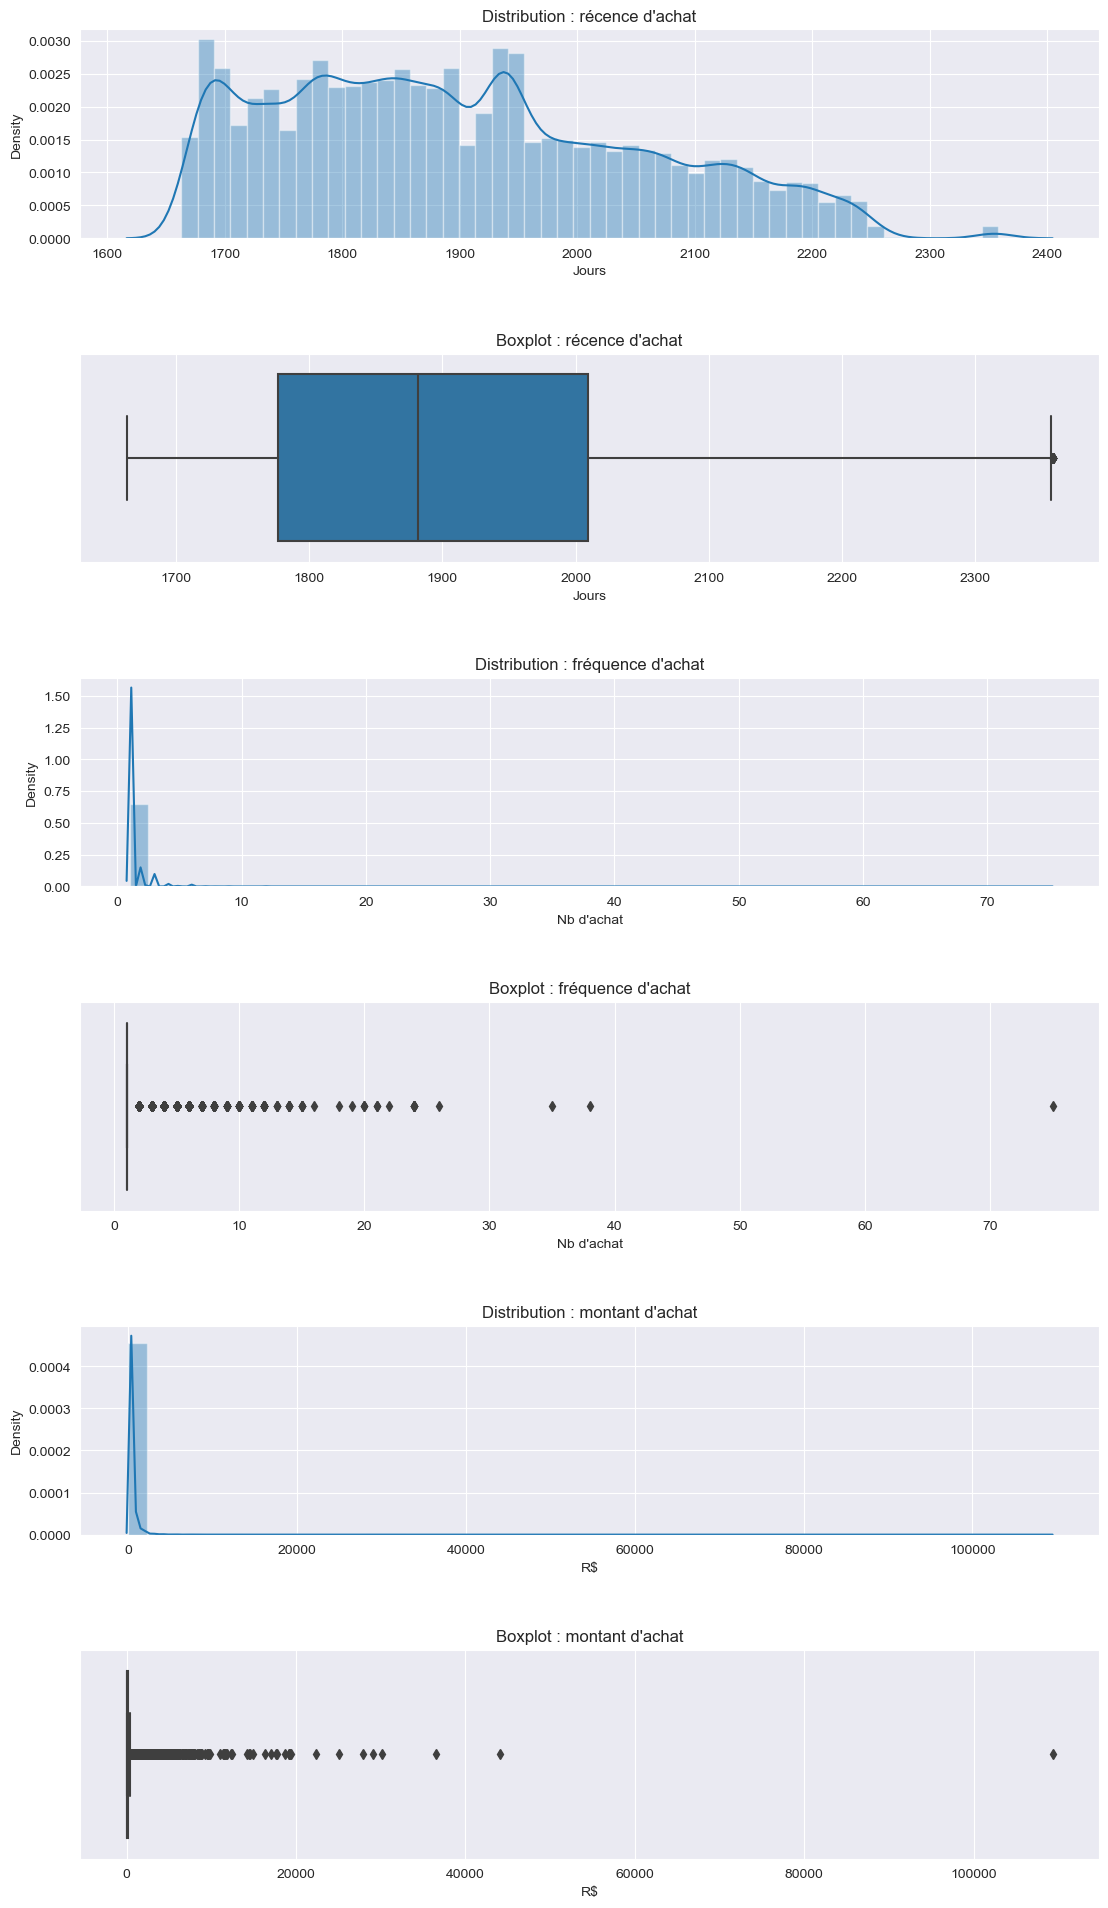

In [45]:
# Représentation graphique : distribution des 3 valeursdu RFM (recency, frequency, monetary)

plt.figure(figsize=(12, 20))

# Recency
plt.subplot(6, 1, 1)
sns.distplot(df_recency['recency'])
plt.title("Distribution : récence d'achat")
plt.xlabel('Jours')

plt.subplot(6, 1, 2)
sns.boxplot(df_recency['recency'])
plt.title("Boxplot : récence d'achat")
plt.xlabel('Jours')


# Frequency
plt.subplot(6, 1, 3)
sns.distplot(df_frequency['frequency'])
plt.title("Distribution : fréquence d'achat")
plt.xlabel("Nb d'achat")

plt.subplot(6, 1, 4)
sns.boxplot(df_frequency['frequency'])
plt.title("Boxplot : fréquence d'achat")
plt.xlabel("Nb d'achat")


# Monetary
plt.subplot(6, 1, 5)
sns.distplot(clean_data['total_payment_value'])
plt.title("Distribution : montant d'achat")
plt.xlabel('R$')

plt.subplot(6, 1, 6)
sns.boxplot(clean_data['total_payment_value'])
plt.title("Boxplot : montant d'achat")
plt.xlabel('R$')


plt.tight_layout(pad = 4)

#### Fusion des RFM

In [46]:
df_RFM = pd.merge(df_recency, df_frequency, on = 'customer_unique_id', how = 'inner')
df_RFM.drop(['order_purchase_timestamp', 'current_date'], axis = 1, inplace = True)
df_RFM

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1775,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1778,1
2,0000f46a3911fa3c0805444483337064,2200,1
3,0000f6ccb0745a6a4b88665a16c9f078,1984,1
4,0004aac84e0df4da2b147fca70cf8255,1951,1
...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,2110,2
92750,fffea47cd6d3cc0a88bd621562a9d061,1925,1
92751,ffff371b4d645b6ecea244b27531430a,2231,1
92752,ffff5962728ec6157033ef9805bacc48,1782,1


#### Fusion globale des datasets

In [48]:
clean_data = pd.merge(clean_data, df_RFM, how = 'left', on = "customer_unique_id")
clean_data

,customer_unique_id,auto,bed_bath_table,computers_accessories,furniture_decor,health_beauty,housewares,other_categories,sports_leisure,telephony,...,mean_price,total_freight_value,mean_payment_sequential,mean_payment_installments,total_payment_value,mean_review_score,mean_freight_ratio,order_purchase_timestamp,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.90,12.00,1.0,8.0,141.90,5.0,0.09,2018-05-10 10:56:27,1775,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,18.90,8.29,1.0,1.0,27.19,4.0,0.44,2018-05-07 11:11:27,1778,1
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,69.00,17.22,1.0,8.0,86.22,3.0,0.25,2017-03-10 21:05:03,2200,1
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25.99,17.63,1.0,4.0,43.62,4.0,0.68,2017-10-12 20:29:41,1984,1
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,180.00,16.89,1.0,6.0,196.89,5.0,0.09,2017-11-14 19:45:42,1951,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,785.00,497.42,1.0,10.0,4134.84,5.0,0.32,2017-06-08 21:00:36,2110,2
92750,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,64.89,19.69,1.0,1.0,84.58,4.0,0.30,2017-12-10 20:07:56,1925,1
92751,ffff371b4d645b6ecea244b27531430a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.90,22.56,1.0,1.0,112.46,5.0,0.25,2017-02-07 15:49:16,2231,1
92752,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.00,18.69,1.0,5.0,133.69,5.0,0.16,2018-05-02 15:17:41,1782,1


In [49]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92754 entries, 0 to 92753
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_unique_id         92754 non-null  object        
 1   auto                       92754 non-null  float64       
 2   bed_bath_table             92754 non-null  float64       
 3   computers_accessories      92754 non-null  float64       
 4   furniture_decor            92754 non-null  float64       
 5   health_beauty              92754 non-null  float64       
 6   housewares                 92754 non-null  float64       
 7   other_categories           92754 non-null  float64       
 8   sports_leisure             92754 non-null  float64       
 9   telephony                  92754 non-null  float64       
 10  toys                       92754 non-null  float64       
 11  watches_gifts              92754 non-null  float64       
 12  mean

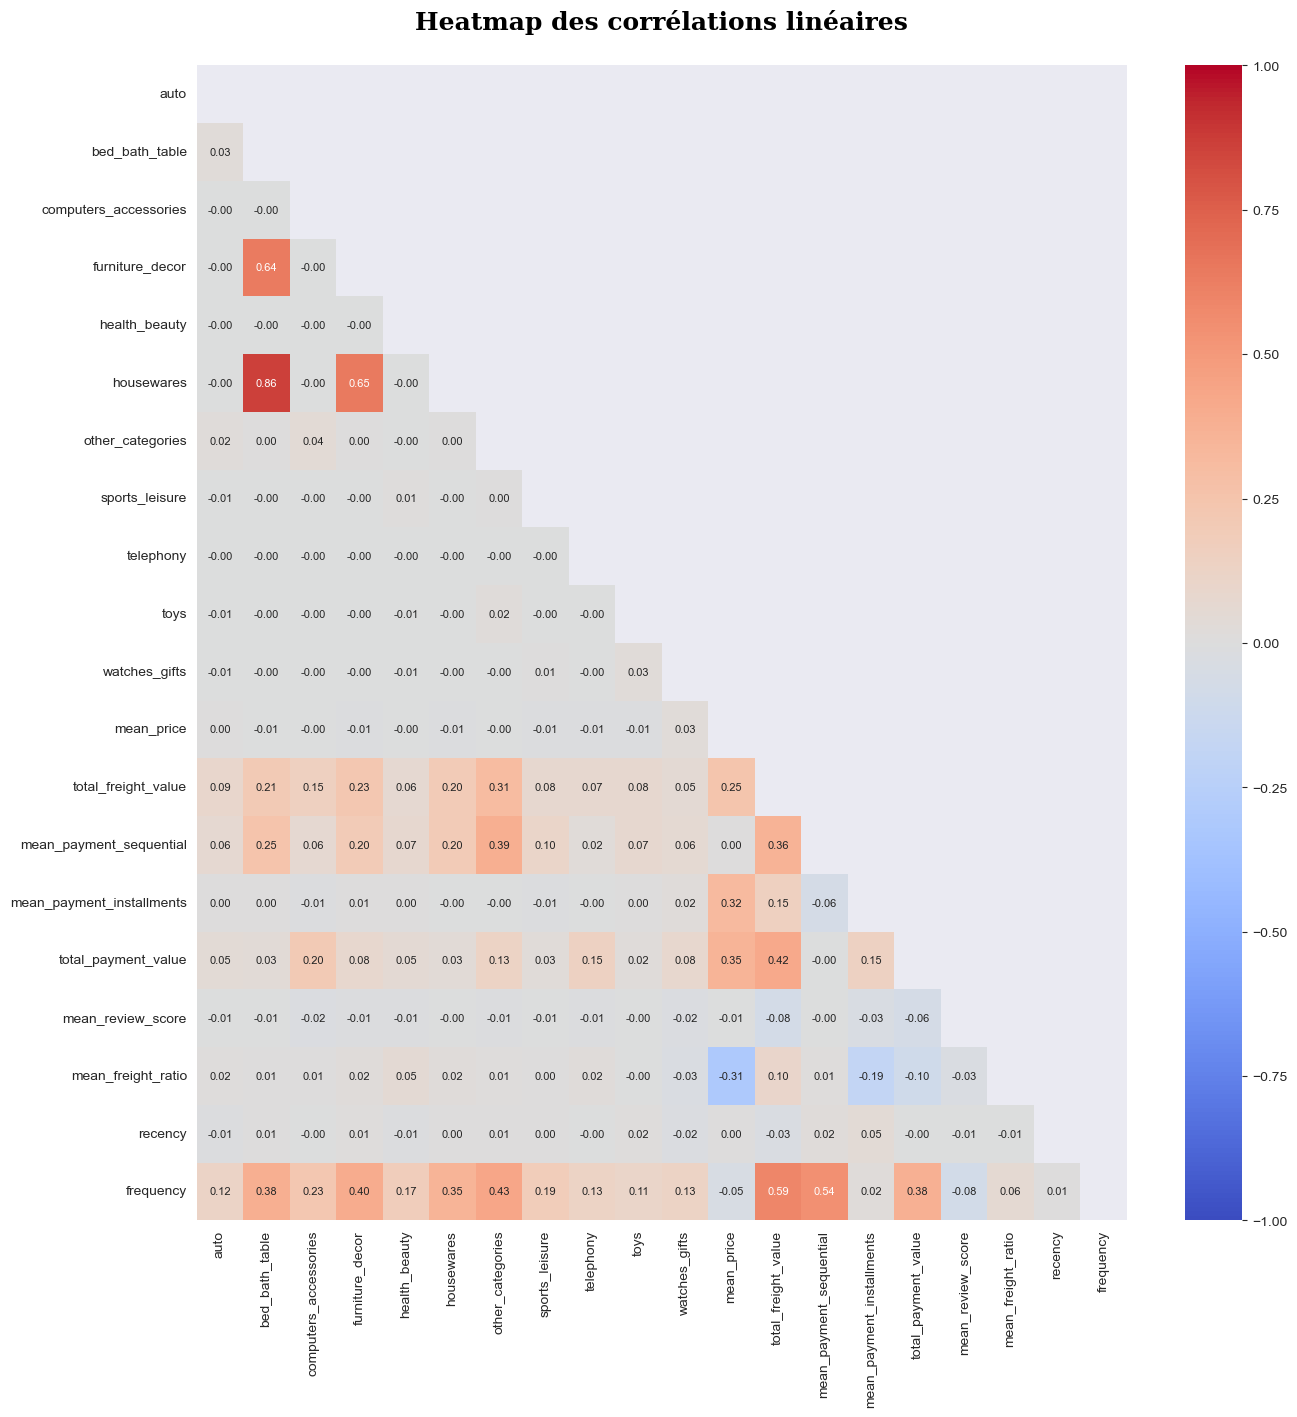

In [50]:
# Analyse des corrélations entre nos différentes variables

corr = clean_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr, annot = True,
                 vmin = -1, vmax = 1,
                 fmt = ".2f", annot_kws = {'size':8}, 
                 mask = mask, 
                 center = 0, 
                 cmap = "coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontdict = font_title)

plt.show()

## Sauvegarde du dataset de modélisation

In [51]:
clean_data.to_csv('clean_data.csv')